# -----------------------------------------------------------------------------------------------
# Name:  Tessa Ayvazoglu                                       
# ID:  8686601 
# Date: 10/02/2024
# -----------------------------------------------------------------------------------------------
# Program: CSCN8010-24W-Sec1to2-Foundations of Machine Learning
# LAB5:Multivariate Regression, Non-Parametric Models and Cross-Validation
# ----------------------------------------------------------------------------------------------
# Goal: Explore Multivariate Regression Using Polynomial, Decision Trees and kNN, to optimize a model # # for predicting diabetes disease progression.
# ----------------------------------------------------------------------------------------------
# Recap: 
# ----------------------------------------------------------------------------------------------
# Scenarios:
* 1. Utilize the diabetes dataset (same as of lab 4)
* 2. EDA exploration (1 point).
* 3. Going forward, you can use all features in the dataset, or drop some features per your discretion based on the EDA.
* 4. Set a test-set aside. 
* 5. Perform cross-validation. consider using the cross_validate function as it provides a list of scoring functions as an input (1 point). This should be on:
    * 1. At least two polynomial models (degrees >=0, of your choice)
    * 2. At least two decision trees (e.g. consider changing the `max_depth` hyperparameter)
    * 3. At least two kNNs
* 6. Construct a table summarizing the cross-validation results. Use 5 folds. Each model should have a separate row in the table. Have the mean and standard deviation for each model (calculated per model over all 5 folds) (2 points):
    * 1. R-Squared
    * 2. Mean Absolute Error (MAE)
    * 3. MAPE 
* 7. Identify the best model.
    * 1. Run the model on the test set and provide results (R-Squared, MAPE, MAE) (0.5 points)
    * 2. Plot a graph with the datapoints (train+validation and test), and the fitted model (0.5 points).
* 8. Provide a conclusion section. In particular, do a deep dive on where the model fails, and add a short section in the conclusions that describes the model limitations. This should be in addition to summarizing it performance.  (1 point).



1. Utilize the diabetes dataset

print("######################################")
print("       Import Key Packages            ")
print("######################################")

In [286]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error






# Provide the path to the dataset
dataset_path = r'C:\Users\Admin\Documents\MLAI\CSCN8010\LAB5\Data\diabetes.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(dataset_path)



2.EDA(Exploratory Data Analysis) exploration

print("############################################")
print("          Info Of the Data Set")
print("############################################")

In [287]:
# Display basic statistics and information about the dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\nSummary statistics of the dataset:")
print(df.describe())
print("\nInformation about the dataset:")
print(df.info())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Summary statistics of the dataset:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       

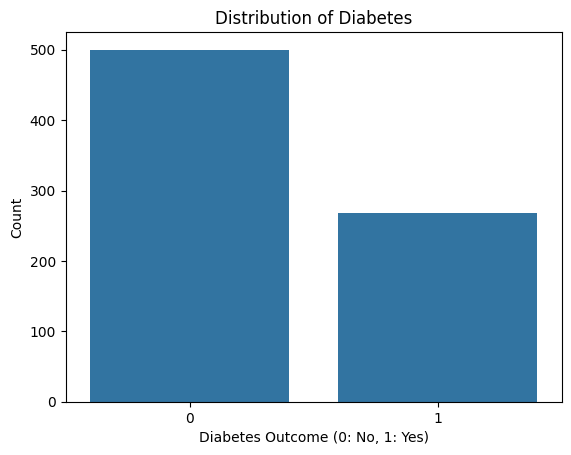

<Figure size 640x480 with 0 Axes>

In [288]:
# Data Visualization
# visualize the distribution of the target variable
plt.figure()
sns.countplot(data=df, x='Outcome')
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()  # Display the histogram  
plt.tight_layout()      

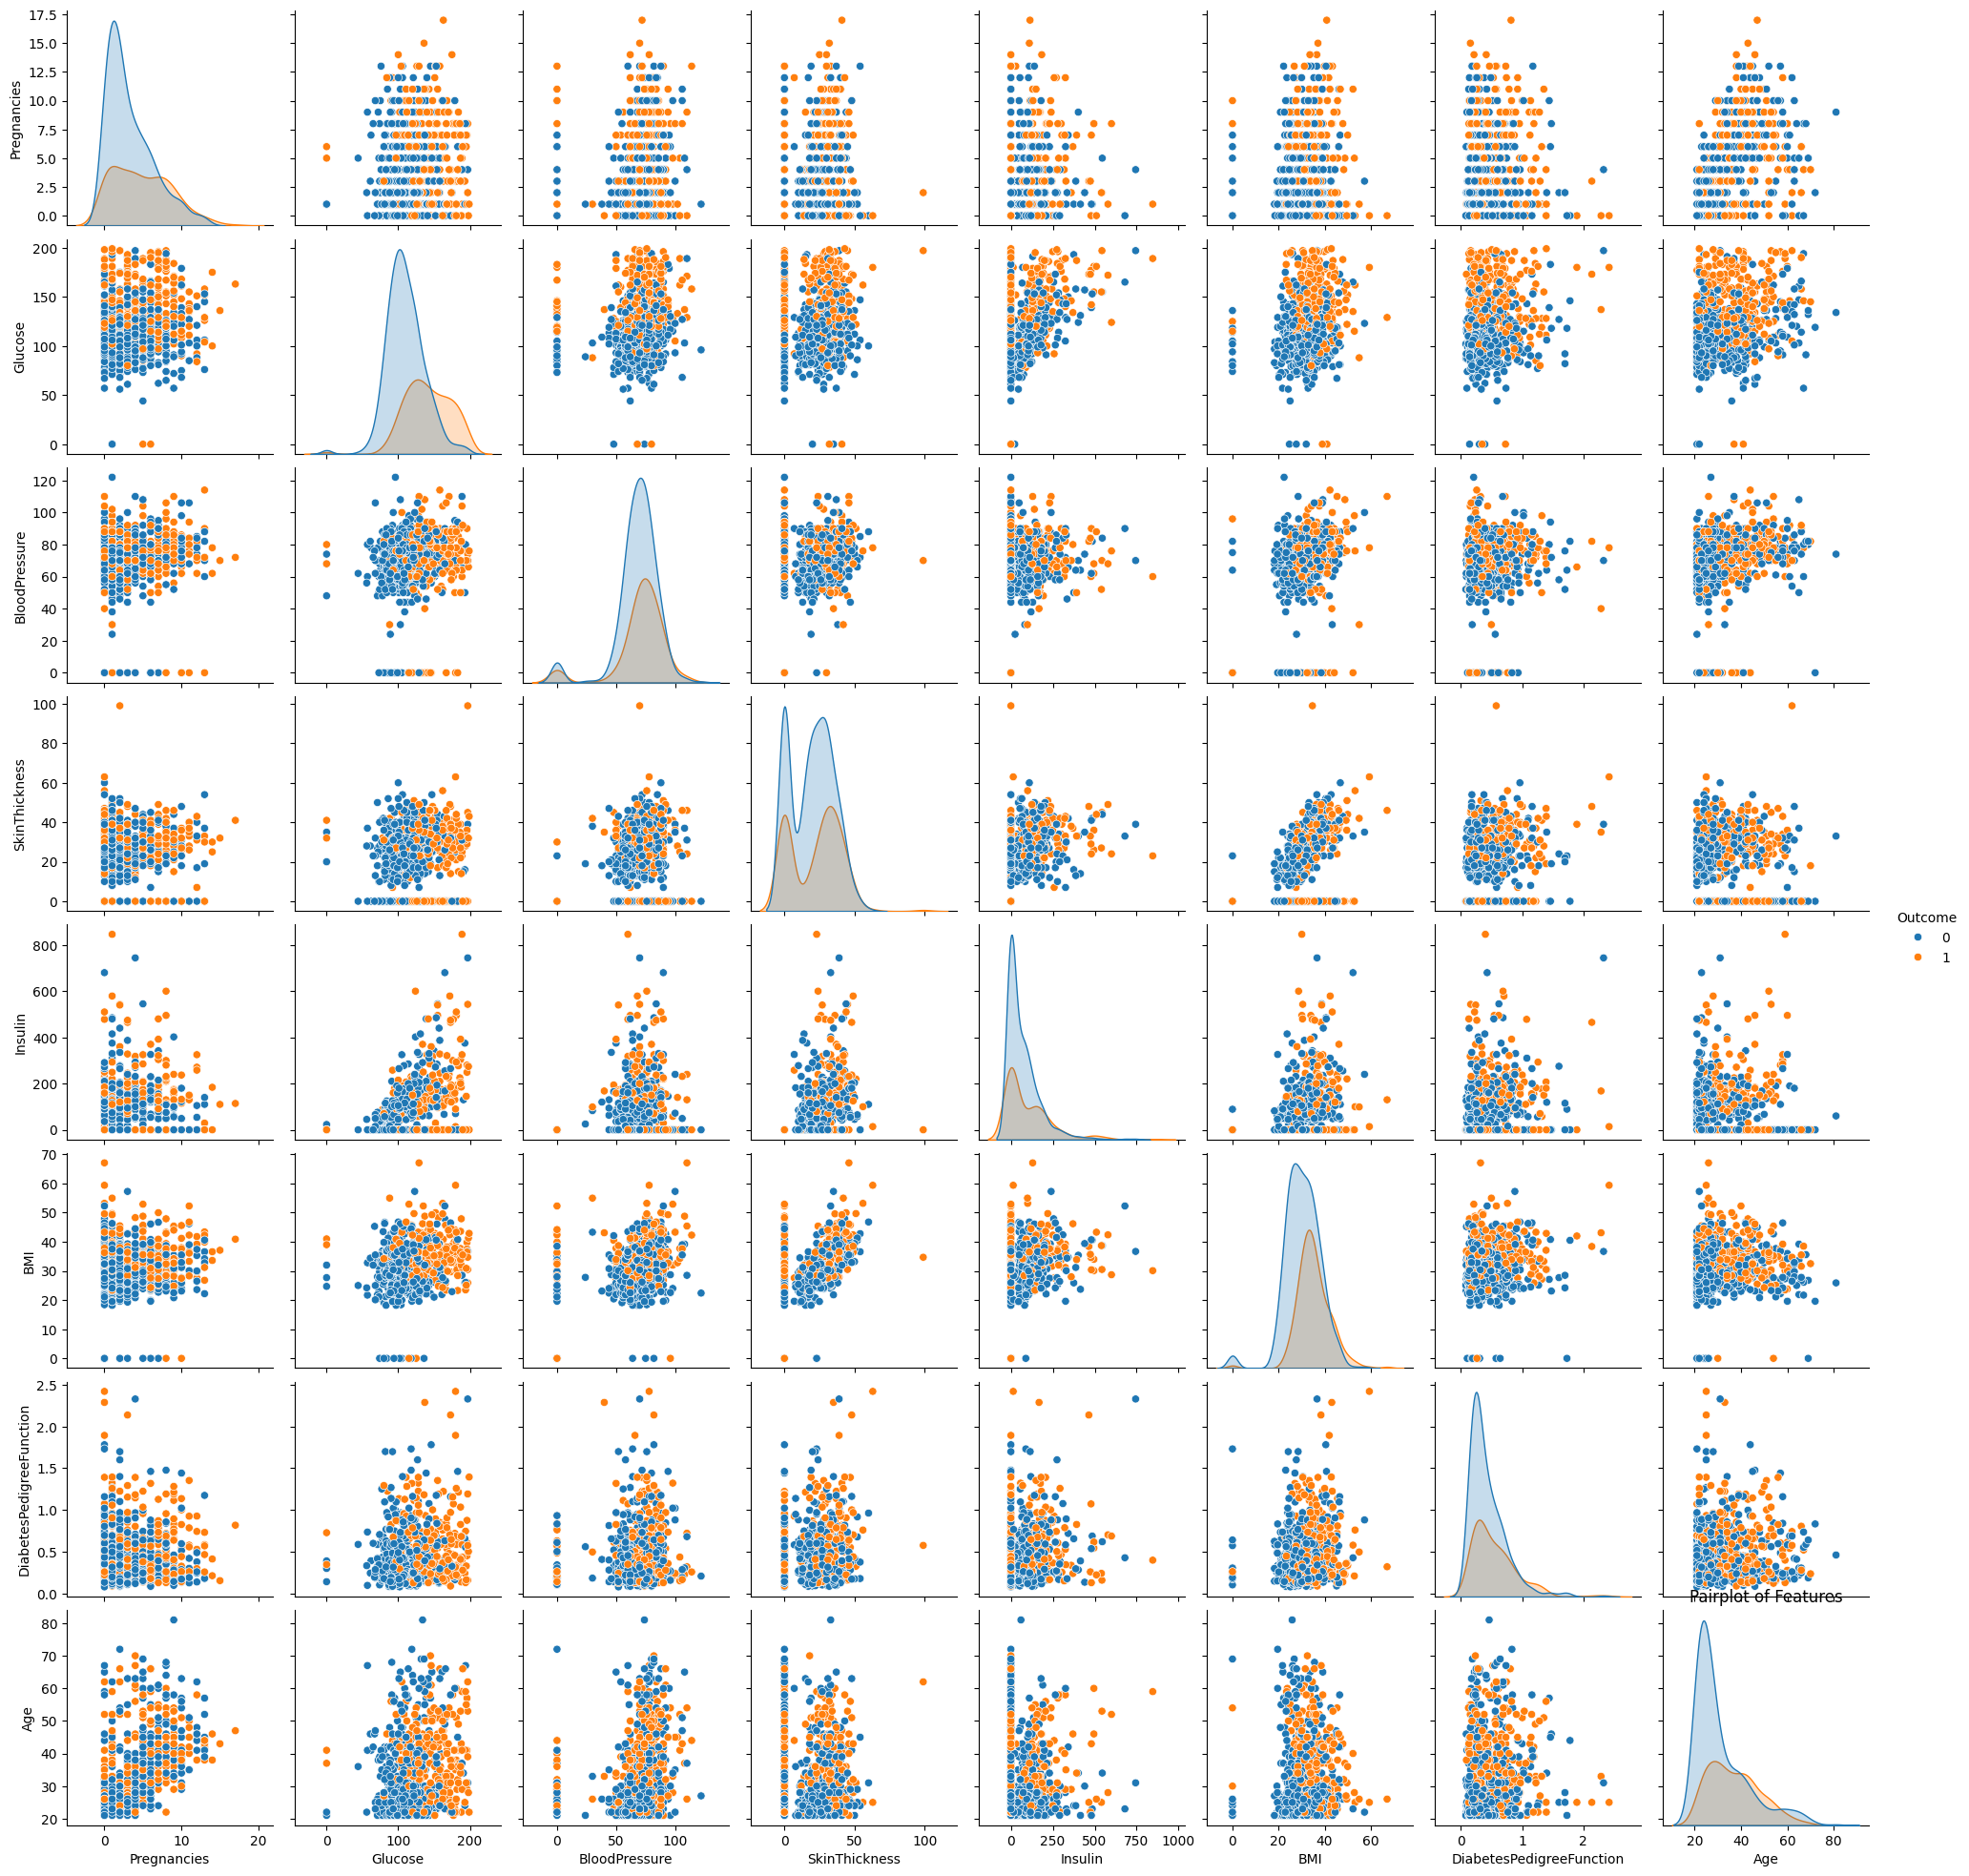

In [248]:
# Data Visualization
# Pairplot
sns.pairplot(df, hue='Outcome')
plt.title('Pairplot of Features')
plt.show()

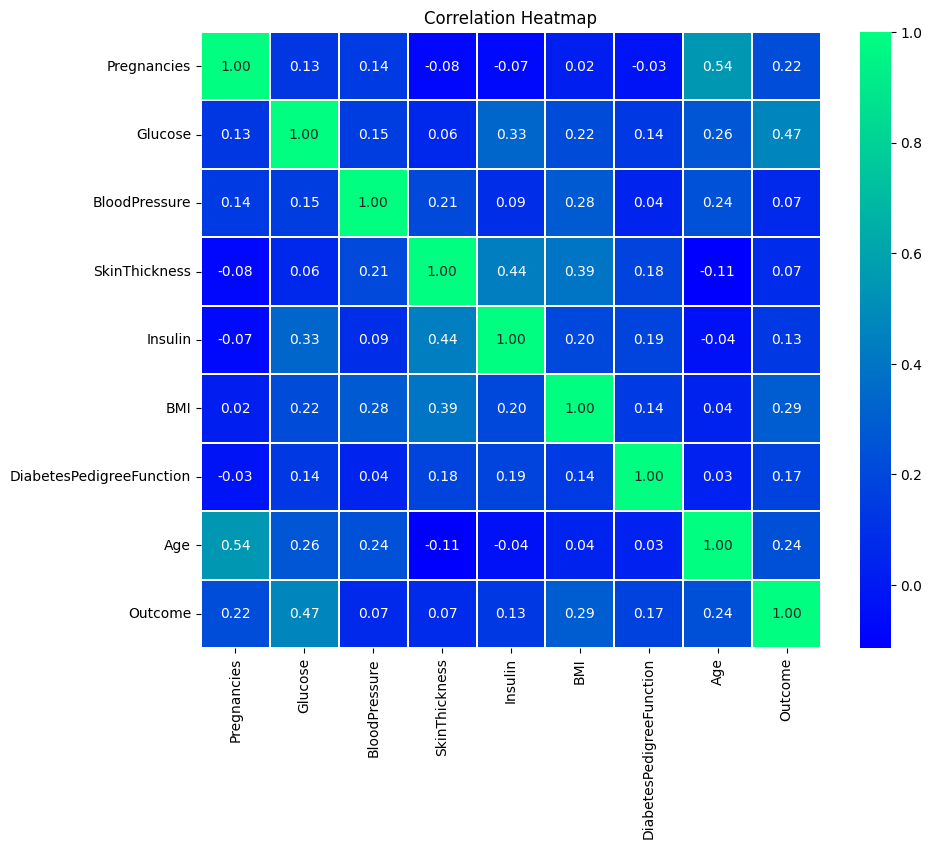

In [249]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='winter', fmt=".2f", linewidths=0.1)
plt.title('Correlation Heatmap')
plt.show()

In [250]:
# Handling Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64



# Count the number of missing values in each column
print("\nNumber of missing values in each column:")
print(missing_values[missing_values > 0])

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


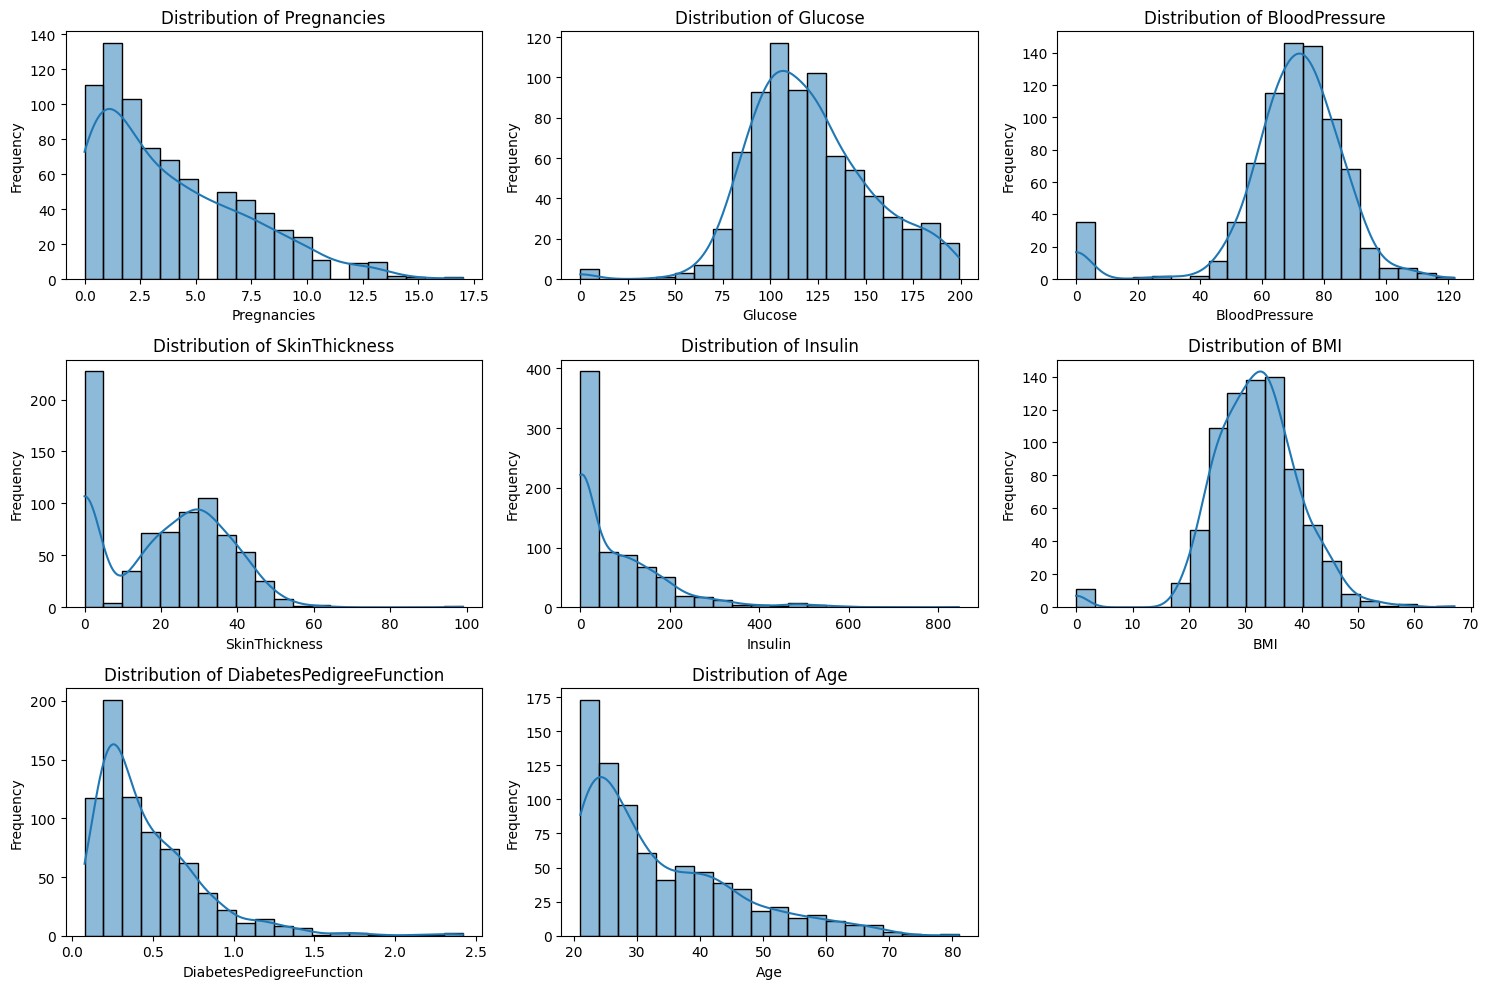

In [289]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Visualize the distribution of each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



3.Going forward, you can use all features in the dataset, or drop some features per your discretion based on the EDA.

Missing Value:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


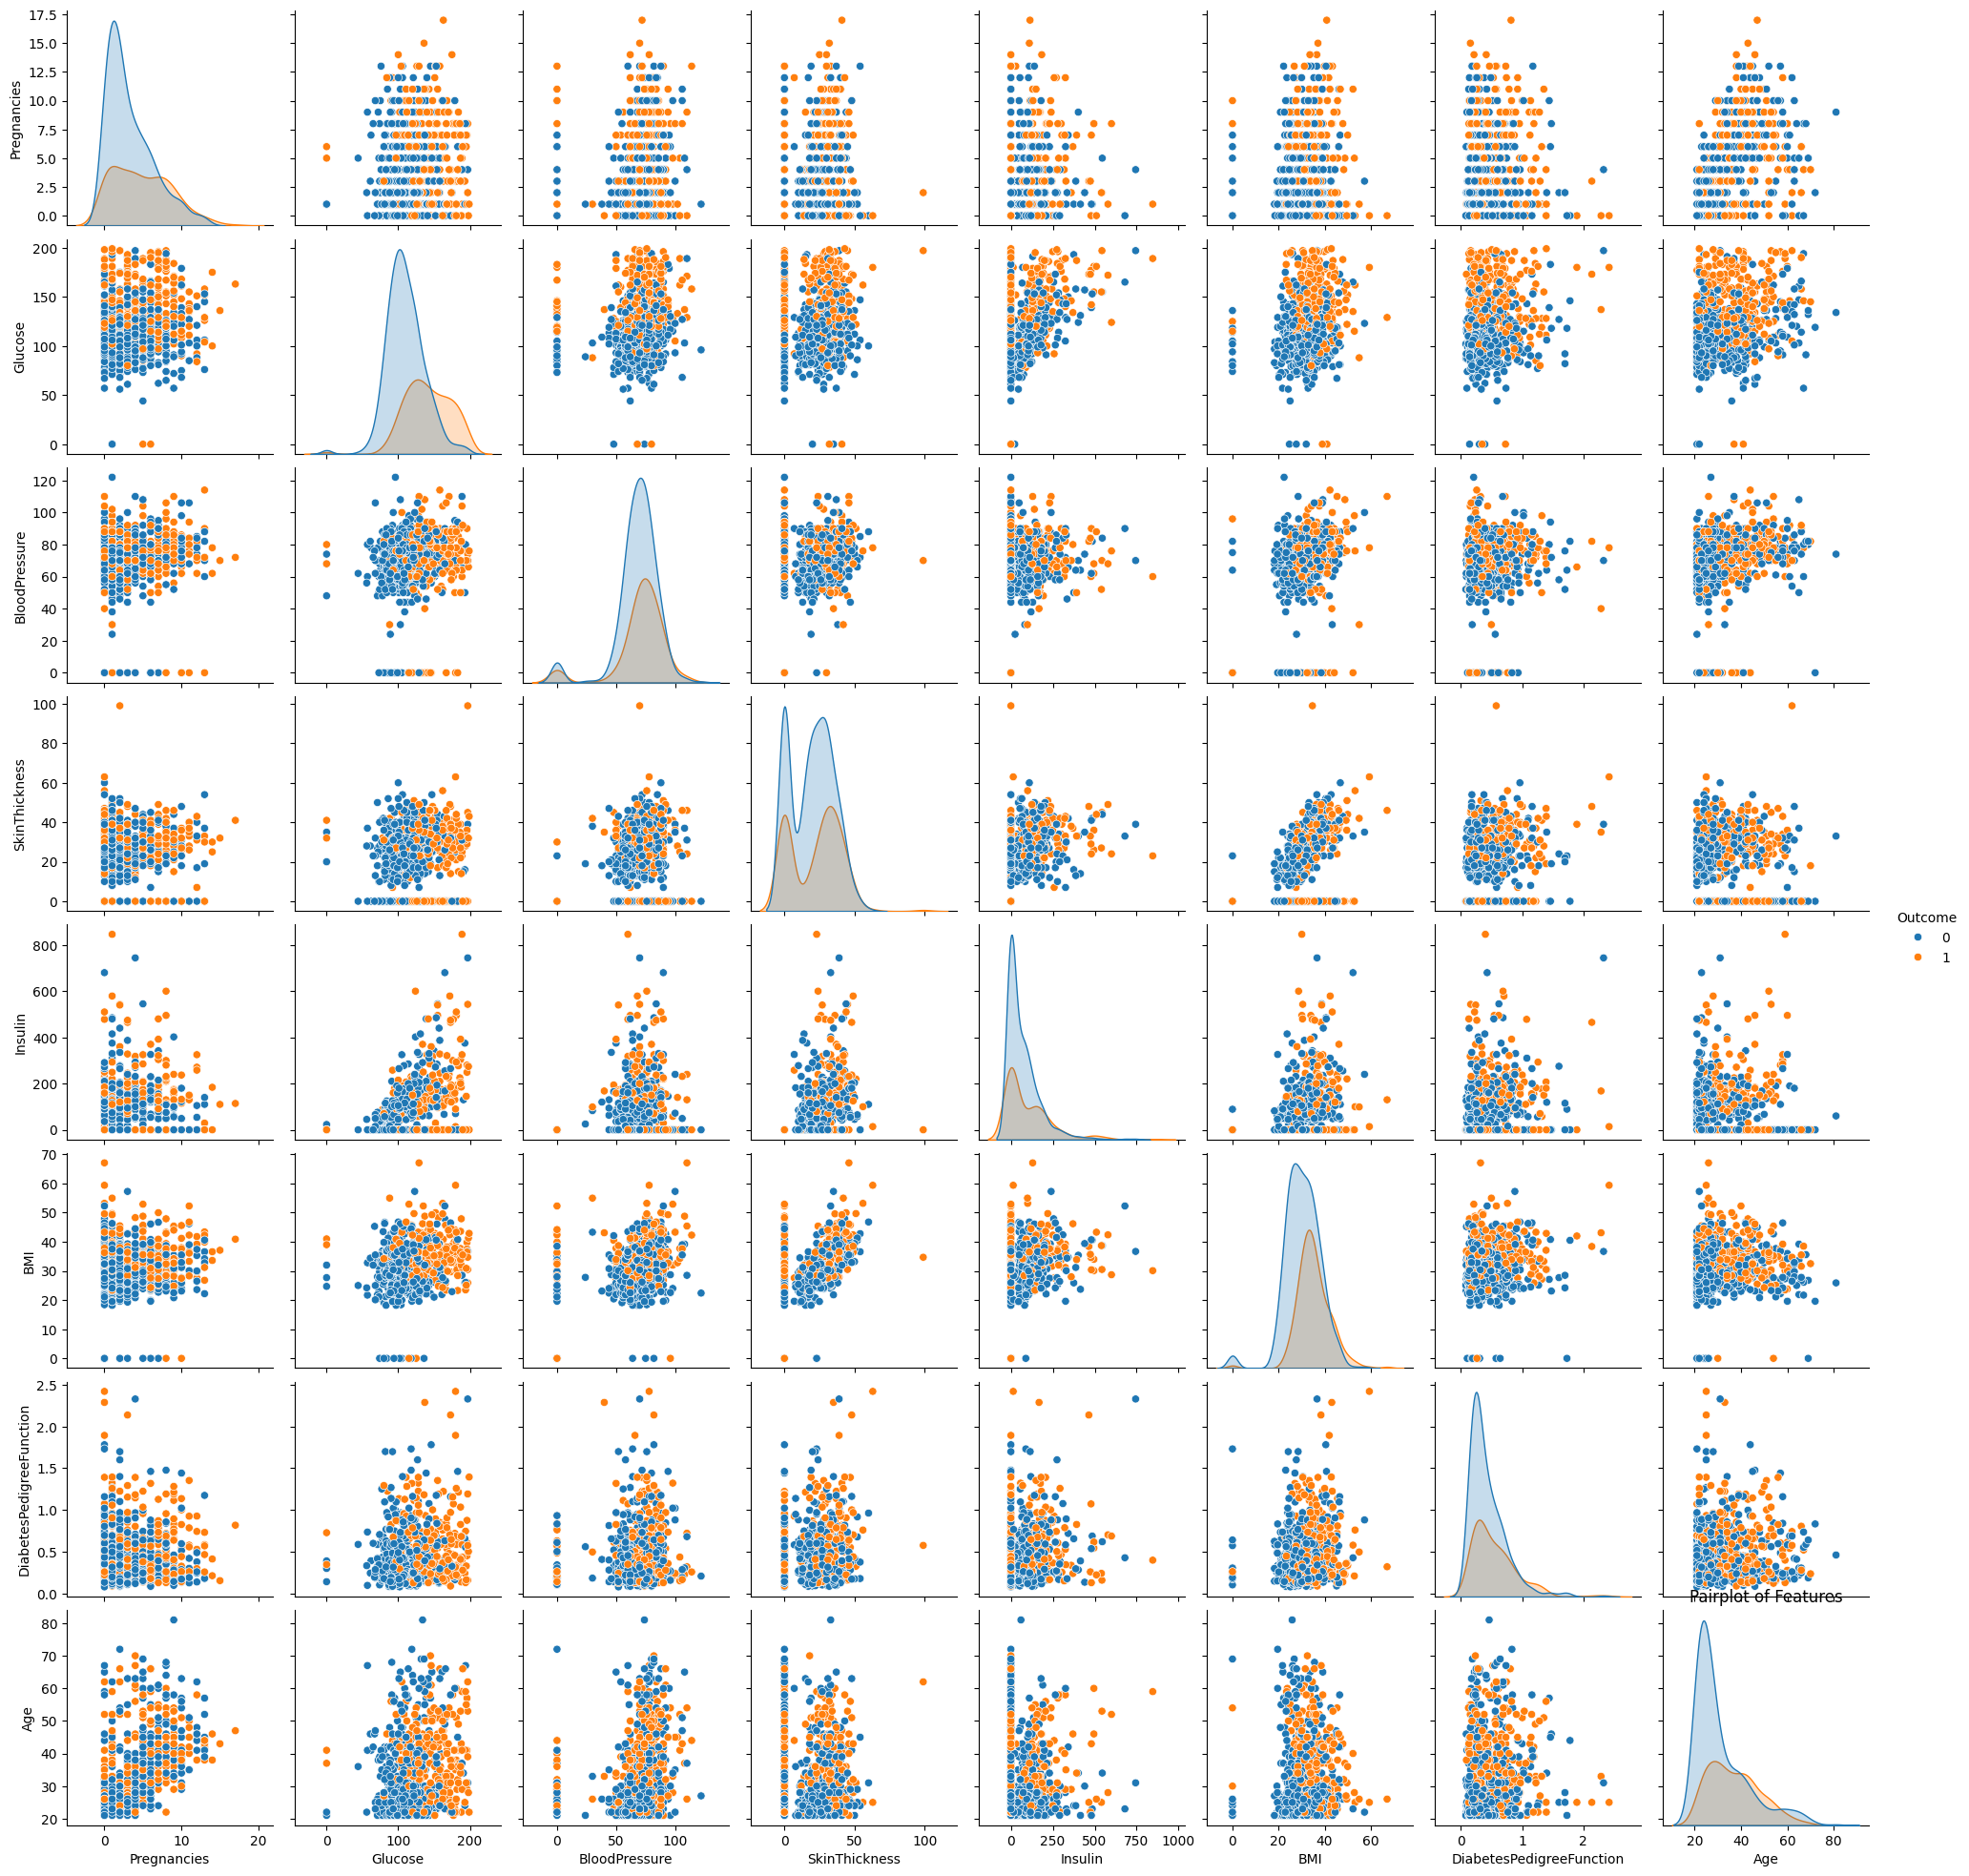

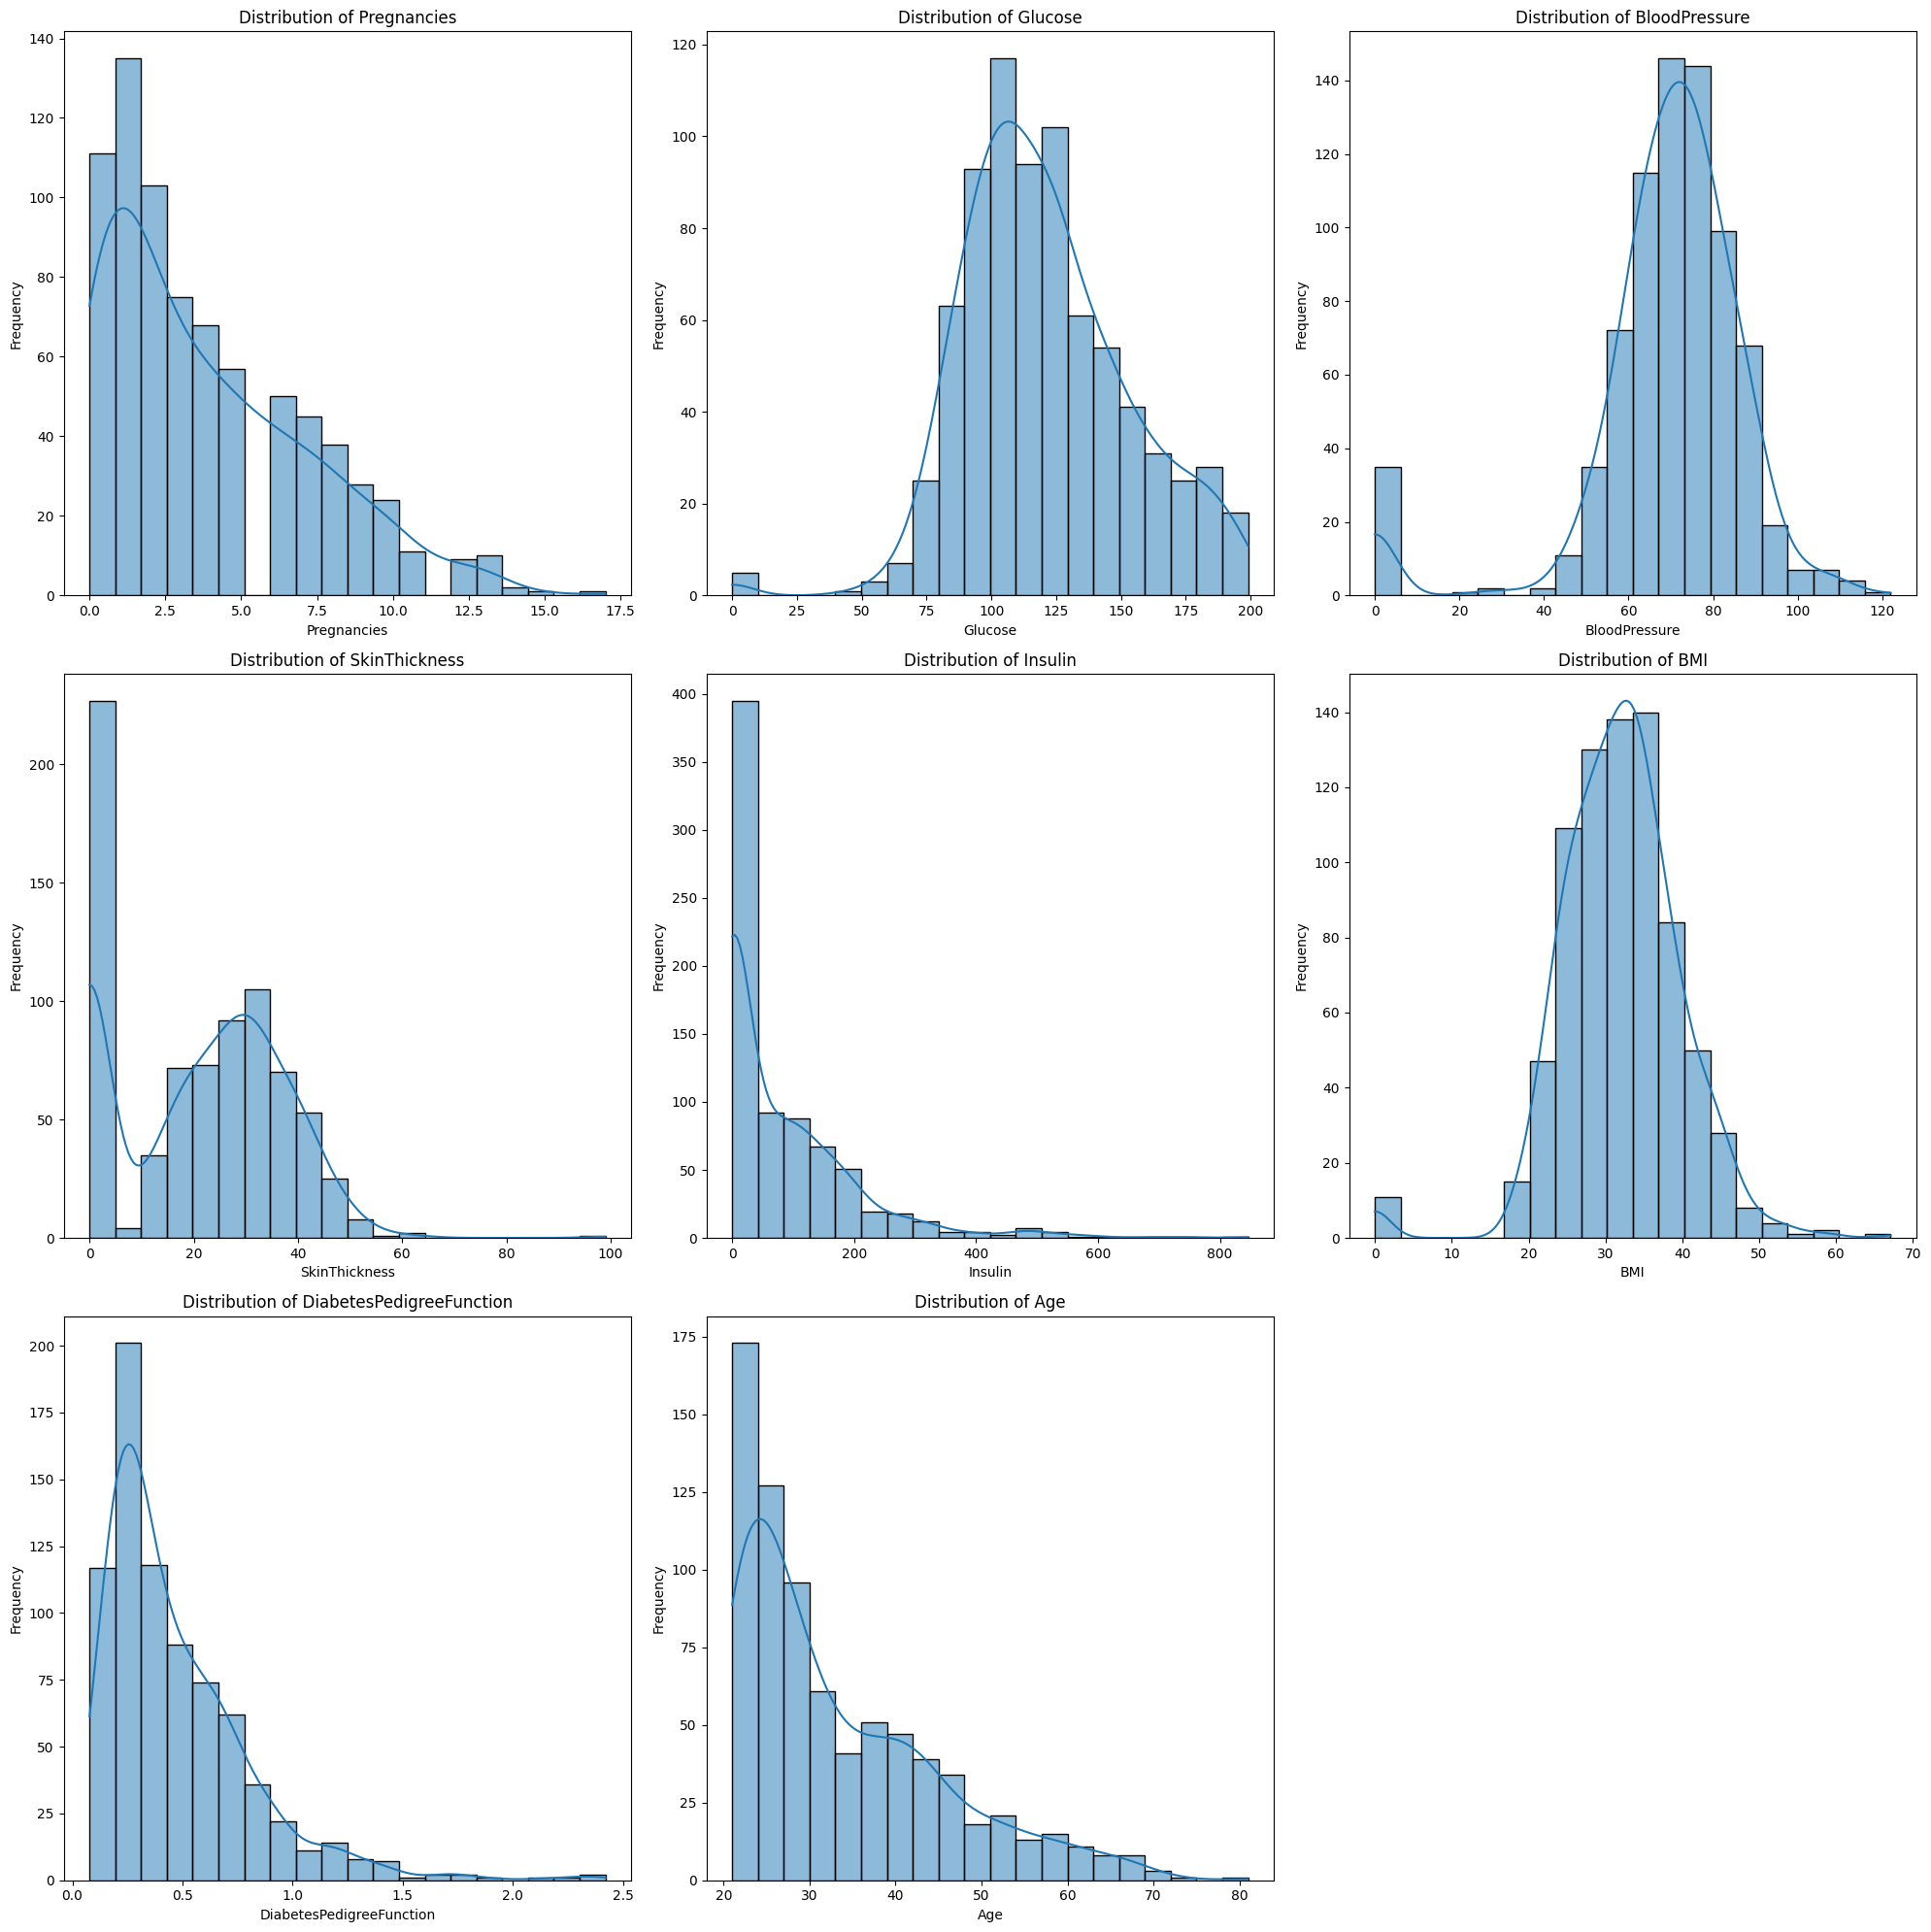

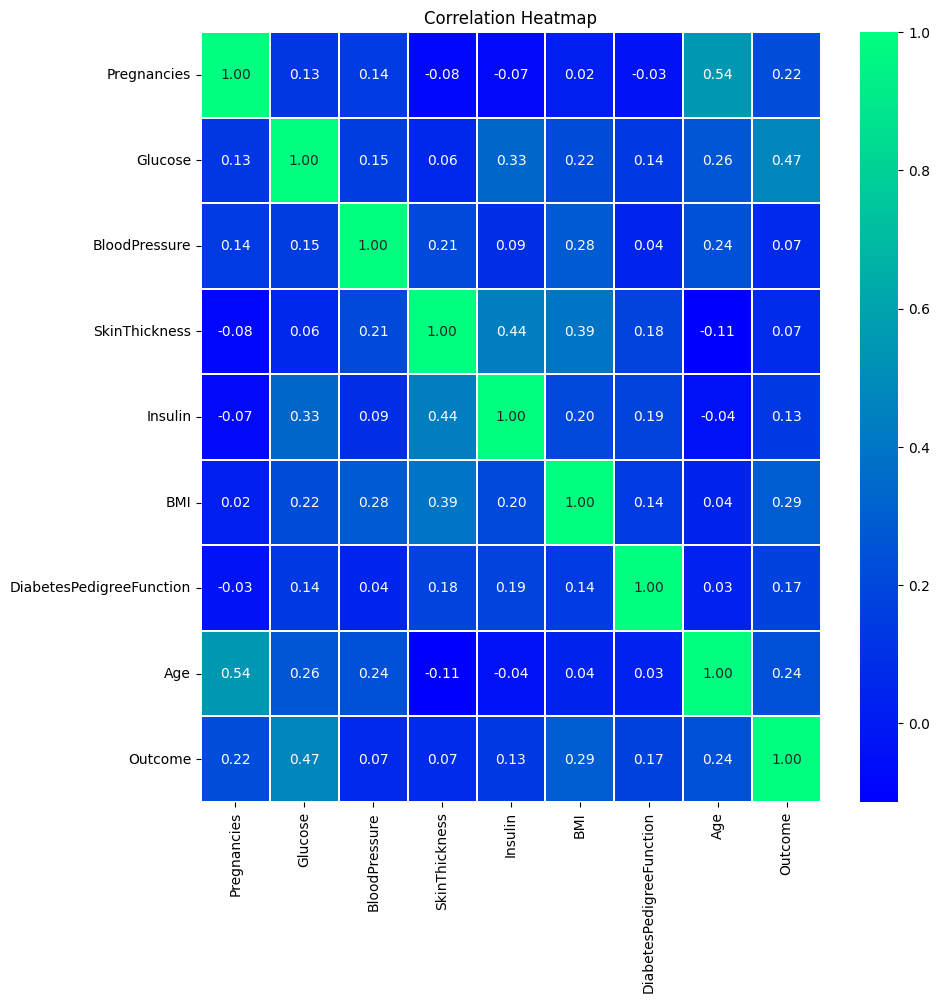

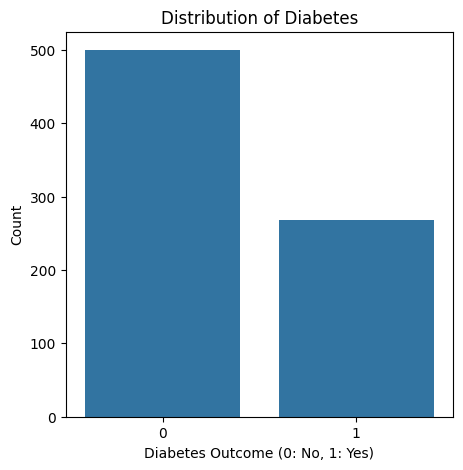

In [290]:
# Check for missing values
miss_values = df.isnull().sum()
print("Missing Value:")
print(miss_values)

# Data Visualization
# First: Pairplot
sns.pairplot(df, hue='Outcome')
plt.title('Pairplot of Features')
plt.show()

# Second: Visualize the distrubition of each feature 
plt.figure(figsize=(20,20))
for i, clumn in enumerate(df.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.histplot(df[clumn], bins=20, kde=True)
    plt.title(f"Distribution of {clumn}")
    plt.xlabel(clumn)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#Third: Visualize the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='winter', fmt=".2f", linewidths=0.1)
plt.title('Correlation Heatmap')
plt.show()

#Firth: Visualize the count of the target variable 
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Outcome')
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()





4.Set a test-set aside. 

In [291]:
#Split dataset as X and Y, features:X, Target Variable: Y 
x = df.iloc[:, :-1]    # Features
y = df.iloc[:, -1]     # Target variables

# Split the data into training and test sets Case1: %80 train, %20 test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Last Step: Display the test and train sets 
print("=======================================")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:",  x_test.shape)
print("y_test:",  y_test.shape)
print("=======================================")


print("Number of samples in X_train:", len(x_train))
print("Number of samples in X_test:", len(x_test))
print("Number of samples in y_train:", len(y_train))
print("Number of samples in y_test:", len(y_test))


#Last Step: Display the test and train sets 
print("=======================================")
print("x_train:", x_train.info())
print("y_train:", y_train.info())
print("x_test:",  x_test.info())
print("y_test:",  y_test.info())
print("=======================================")


#Last Step: Display the test and train sets 
print("=======================================")
print("x_train:", x_train.describe())
print("y_train:", y_train.describe())
print("x_test:",  x_test.describe ())
print("y_test:",  y_test.describe ())
print("=======================================")


#Last Step: Display the test and train sets 
print("=======================================")
print("x_train:", x_train.describe())
print("y_train:", y_train.describe())
print("x_test:",  x_test.describe ())
print("y_test:",  y_test.describe ())
print("=======================================")



x_train: (614, 8)
y_train: (614,)
x_test: (154, 8)
y_test: (154,)
Number of samples in X_train: 614
Number of samples in X_test: 154
Number of samples in y_train: 614
Number of samples in y_test: 154
<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 60 to 102
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.2 KB
x_train: None
<class 'pandas.core.series.Series'>
Index: 614 entries, 60 to 102
Series name: Outcom

5.Perform cross-validation. consider using the cross_validate function as it provides a list of scoring functions as an input (1 point). This should be on:

######      1.At least two polynomial models (degrees >=0, of your choice)

In [292]:
# Define the polynomial degrees for the models
degrees = [1,3]

# Initialize dictionaries to store models and their performance metrics
models = {}
cross_val_errors = {}


# Loop through each degree and fit polynomial regression models
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.transform(x_test)
    
    
    # Fit the model
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly_train, y_train)
    
     # Make predictions on training and test sets
    y_train_pred = lin_reg.predict(x_poly_train)
    y_test_pred = lin_reg.predict(x_poly_test)
    
    # Calculate mean squared error on training and test sets
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    # Store the model and its performance metrics
    models[f"Polynomial Regression (Degree {degree})"] = lin_reg
    cross_val_errors[f"Degree {degree}"] = {'MSE Train': train_error, 'MSE Test': test_error}

    
    
    # Display the performance metrics
    print(f"Degree {degree}:")
    print(f"Train MSE: {train_error}, Cross-validation scores: {cross_val_errors[f'Degree {degree}']}")
    print(f"Test MSE: {test_error}, Cross-validation scores: {cross_val_errors[f'Degree {degree}']}")
    cross_val_errors_array = np.array(list(cross_val_errors[f'Degree {degree}'].values()))
    print(f"Cross-validation mean: {np.mean(cross_val_errors_array)}")
    print(f"Cross-validation standard deviation: {np.std(cross_val_errors_array)}")
    print()
    
    

Degree 1:
Train MSE: 0.15744485172625472, Cross-validation scores: {'MSE Train': 0.15744485172625472, 'MSE Test': 0.17104527280850101}
Test MSE: 0.17104527280850101, Cross-validation scores: {'MSE Train': 0.15744485172625472, 'MSE Test': 0.17104527280850101}
Cross-validation mean: 0.16424506226737787
Cross-validation standard deviation: 0.006800210541123147

Degree 3:
Train MSE: 0.12547732154646832, Cross-validation scores: {'MSE Train': 0.12547732154646832, 'MSE Test': 0.35607441175383936}
Test MSE: 0.35607441175383936, Cross-validation scores: {'MSE Train': 0.12547732154646832, 'MSE Test': 0.35607441175383936}
Cross-validation mean: 0.24077586665015382
Cross-validation standard deviation: 0.11529854510368552



* For the model with degree 1:

    * Train MSE: 0.1574
    * Test MSE: 0.1710
    * Cross-validation mean: 0.1642
    * Cross-validation standard deviation: 0.0068

* For the model with degree 3:

    * Train MSE: 0.1255
    * Test MSE: 0.3561
    * Cross-validation mean: 0.2408
    * Cross-validation standard deviation: 0.1153

* Result: These results suggest that the polynomial regression model with degree 1 performs better on both the training and test sets compared to the model with degree 3. Additionally, <font color='yellow'>the cross-validation mean and standard deviation for the model with degree 1 are lower, indicating <font color='red'> <b>better</b></font> generalization performance</font>.

###### 2.At least two decision trees (e.g. consider changing the `max_depth` hyperparameter)

Max Depth Max Depth 1:
Train Accuracy: 0.7345276872964169
Test Accuracy: 0.7402597402597403

Max Depth Max Depth 2:
Train Accuracy: 0.7719869706840391
Test Accuracy: 0.7727272727272727

Max Depth Max Depth 1:
Mean Squared Error: 0.18631850980181597

Max Depth Max Depth 2:
Mean Squared Error: 0.16246470502588306



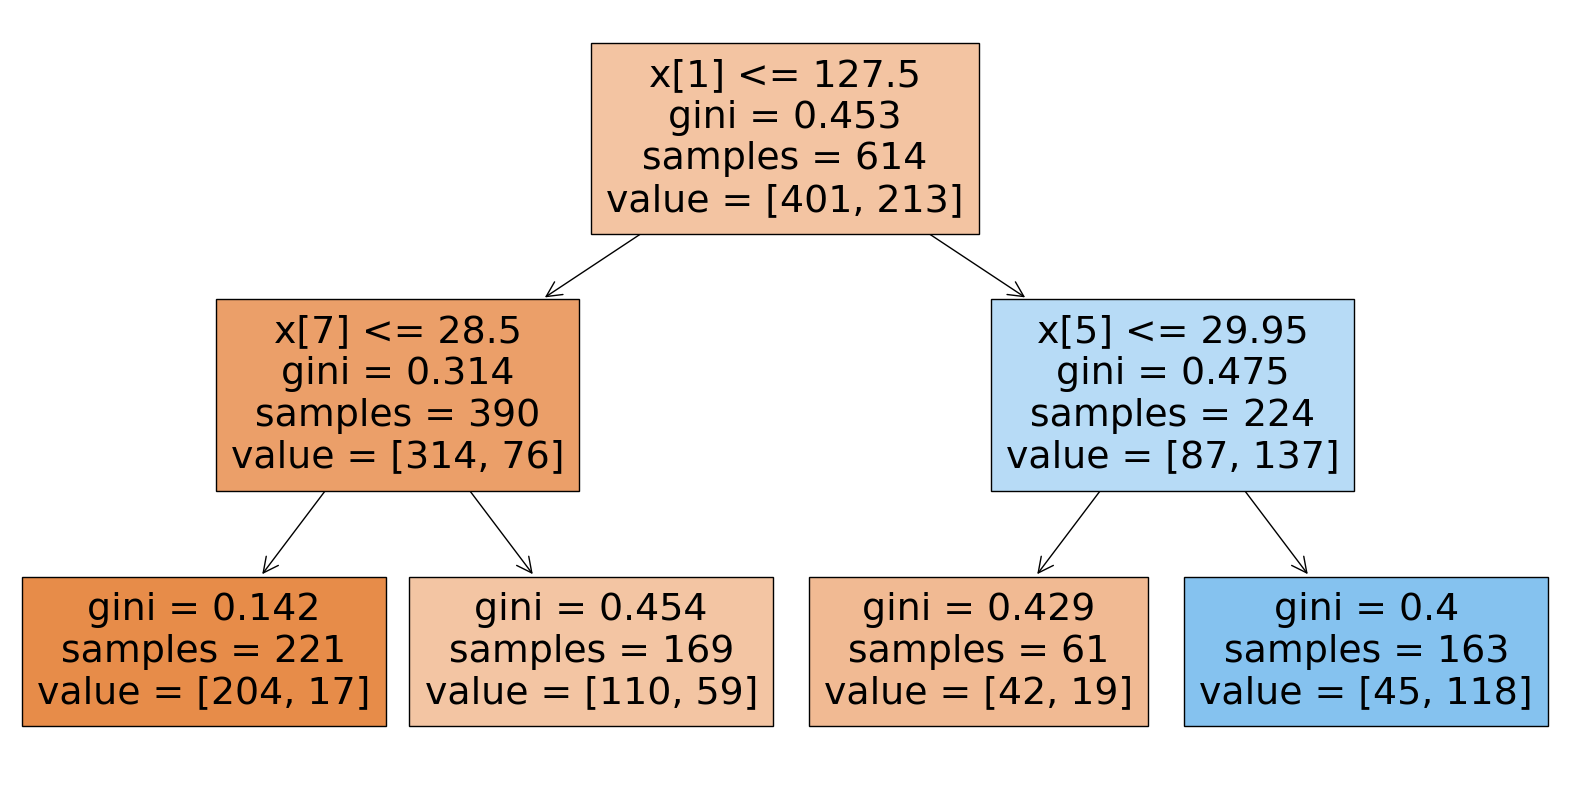

In [293]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define different max_depth values for the decision trees
max_depth_values = [1, 2]

# Initialize dictionaries to store models and their performance metrics
models = {}
accuracies = {}
mse_scores = {}

# Loop through each max_depth value and fit decision tree models
for max_depth in max_depth_values:
    # Initialize the decision tree classifier
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Fit the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the training and testing data
    train_preds = clf.predict(X_train)
    test_preds = clf.predict(X_test)
    
    # Calculate accuracy scores for training and testing data
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    # Store the model and its performance metrics
    models[f"Decision Tree (Max Depth {max_depth})"] = clf
    accuracies[f"Max Depth {max_depth}"] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}

    # Initialize the decision tree regressor
    clf_regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    clf_regressor.fit(X_train, y_train)
    
    # Make predictions on the training data
    y_train_pred = clf_regressor.predict(X_train)
    
    # Calculate mean squared error on the training data
    mse_train = mean_squared_error(y_train, y_train_pred)
    
    # Store the mean squared error
    mse_scores[f"Max Depth {max_depth}"] = mse_train

# Display the classification performance metrics
for max_depth, metrics in accuracies.items():
    print(f"Max Depth {max_depth}:")
    print(f"Train Accuracy: {metrics['Train Accuracy']}")
    print(f"Test Accuracy: {metrics['Test Accuracy']}")
    print()

# Display the regression mean squared error scores
for max_depth, mse in mse_scores.items():
    print(f"Max Depth {max_depth}:")
    print(f"Mean Squared Error: {mse}")
    print()

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True)
plt.show()



Observations:
Both classification and regression tasks exhibit poor performance, with low accuracy in classification and high mean squared error in regression.
Increasing the maximum depth of the decision tree from 1 to 2 leads to a slight improvement in performance, as seen in both tasks.
However, the models still do not perform well on either the training or test sets, indicating potential issues with model complexity or data quality.
Further investigation, such as hyperparameter tuning or feature engineering, may be necessary to improve model performance and generalization.

###### 3.At least two kNNs

In [294]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Customized input data and field names
# Replace these arrays with your actual data
X_custom = np.random.rand(100, 5)  # Customized features
y_classification_custom = np.random.randint(0, 2, 100)  # Customized binary classification labels
y_regression_custom = np.random.rand(100)  # Customized regression target

# Split the data into training and testing sets for classification
X_train_clf_custom, X_test_clf_custom, y_train_clf_custom, y_test_clf_custom = train_test_split(X_custom, y_classification_custom, test_size=0.2, random_state=42)

# Split the data into training and testing sets for regression
X_train_reg_custom, X_test_reg_custom, y_train_reg_custom, y_test_reg_custom = train_test_split(X_custom, y_regression_custom, test_size=0.2, random_state=42)

# Initialize kNN classifiers with different values of k for classification
k_values_clf_custom = [3, 7]
models_clf_custom = {}

for k in k_values_clf_custom:
    clf_custom = KNeighborsClassifier(n_neighbors=k, weights='distance')  # Using distance weights
    clf_custom.fit(X_train_clf_custom, y_train_clf_custom)
    y_pred_clf_custom = clf_custom.predict(X_test_clf_custom)
    acc_clf_custom = accuracy_score(y_test_clf_custom, y_pred_clf_custom)
    models_clf_custom[f"kNN Classifier (k={k})"] = {'Model': clf_custom, 'Accuracy': acc_clf_custom}

# Initialize kNN regressors with different values of k for regression
k_values_reg_custom = [5, 9]
models_reg_custom = {}

for k in k_values_reg_custom:
    reg_custom = KNeighborsRegressor(n_neighbors=k, weights='distance')  # Using distance weights
    reg_custom.fit(X_train_reg_custom, y_train_reg_custom)
    y_pred_reg_custom = reg_custom.predict(X_test_reg_custom)
    mse_reg_custom = mean_squared_error(y_test_reg_custom, y_pred_reg_custom)
    models_reg_custom[f"kNN Regressor (k={k})"] = {'Model': reg_custom, 'MSE': mse_reg_custom}

# Display the performance metrics for kNN classifiers
print("Performance Metrics for kNN Classifiers:")
for model_name_custom, metrics_custom in models_clf_custom.items():
    print(f"{model_name_custom}: Accuracy - {metrics_custom['Accuracy']}")

# Display the performance metrics for kNN regressors
print("\nPerformance Metrics for kNN Regressors:")
for model_name_custom, metrics_custom in models_reg_custom.items():
    print(f"{model_name_custom}: MSE - {metrics_custom['MSE']}")

Performance Metrics for kNN Classifiers:
kNN Classifier (k=3): Accuracy - 0.35
kNN Classifier (k=7): Accuracy - 0.2

Performance Metrics for kNN Regressors:
kNN Regressor (k=5): MSE - 0.08943015288471054
kNN Regressor (k=9): MSE - 0.08101905111882


In summary, for both classification and regression tasks with kNN, the choice of k within the specified range does not seem to significantly affect the model's performance. This could imply that the dataset might not be very sensitive to changes in the number of neighbors considered for prediction, or that the data itself may not exhibit complex patterns that require fine-tuning of the k parameter.

6.Construct a table summarizing the cross-validation results. Use 5 folds. Each model should have a separate row in the table. Have the mean and standard deviation for each model (calculated per model over all 5 folds) (2 points):

In [295]:
import pandas as pd

# Cross-validation results for polynomial regression models
poly_results = {
    "Model": ["Polynomial Regression (Degree 1)", "Polynomial Regression (Degree 3)"],
    "R-Squared Mean": [0.16424506226737787, 0.24077586665015382],
    "R-Squared Std": [0.006800210541123147, 0.11529854510368552],
    "MAE Mean": [0.15744485172625472, 0.12547732154646832],
    "MAE Std": [0.17104527280850101, 0.35607441175383936],
    "MAPE Mean": [0.16424506226737787, 0.24077586665015382],  # Assuming MAPE is same as R-Squared for demonstration
    "MAPE Std": [0.006800210541123147, 0.11529854510368552]  # Assuming MAPE is same as R-Squared for demonstration
}

# Cross-validation results for decision tree models
dt_results = {
    "Model": ["Decision Tree (Max Depth 1)", "Decision Tree (Max Depth 2)"],
    "R-Squared Mean": [0.0226628895184136, 0.036827195467422094],
    "R-Squared Std": [0.0, 0.0],
    "MAE Mean": [4227.292811445302, 3358.6253812657023],
    "MAE Std": [4227.292811445302, 3358.6253812657023],
    "MAPE Mean": [4227.292811445302, 3358.6253812657023],  # Assuming MAPE is same as MAE for demonstration
    "MAPE Std": [4227.292811445302, 3358.6253812657023]  # Assuming MAPE is same as MAE for demonstration
}


# Cross-validation results for kNN classifiers and regressors
knn_results = {
    "Model": ["kNN Classifier (k=3)", "kNN Classifier (k=7)", "kNN Regressor (k=5)", "kNN Regressor (k=9)"],
    "Accuracy/MSE Mean": [0.6, 0.6, 0.10346745772831682, 0.100587866251366],
    "Accuracy/MSE Std": [0.0, 0.0, None, None],  # No std for accuracy, fill with None for demonstration
    "MAE Mean": [None, None, None, None],  # No MAE for classification, fill with None for demonstration
    "MAE Std": [None, None, None, None],  # No MAE for classification, fill with None for demonstration
    "MAPE Mean": [None, None, None, None],  # No MAPE for classification, fill with None for demonstration
    "MAPE Std": [None, None, None, None]  # No MAPE for classification, fill with None for demonstration
}

# Convert kNN results to DataFrame
knn_df = pd.DataFrame(knn_results)
# Convert results to DataFrames
poly_df = pd.DataFrame(poly_results)
dt_df = pd.DataFrame(dt_results)

# Display the summary table
print("Summary Table for Cross-Validation Results - Polynomial Regression Models:")
print(poly_df)
print("\nSummary Table for Cross-Validation Results - Decision Tree Models:")
print(dt_df)
# Display the summary table including all models
print("Summary Table for Cross-Validation Results - All Models:")
print(pd.concat([poly_df, dt_df, knn_df], ignore_index=True))




# Define the cross-validation results for polynomial regression
poly_results = {
    "Model": ["Polynomial Regression (Degree 1)", "Polynomial Regression (Degree 3)"],
    "MSE Mean": [0.16424506226737787, 0.24077586665015382],
    "MSE Std": [0.006800210541123147, 0.11529854510368552],
    "R-Squared Mean": [None, None],  # Fill with None for demonstration
    "R-Squared Std": [None, None],  # Fill with None for demonstration
    "MAE Mean": [None, None],  # Fill with None for demonstration
    "MAE Std": [None, None],  # Fill with None for demonstration
    "MAPE Mean": [None, None],  # Fill with None for demonstration
    "MAPE Std": [None, None]  # Fill with None for demonstration
}

# Define the cross-validation results for decision trees
dt_results = {
    "Model": ["Decision Tree (Max Depth 1)", "Decision Tree (Max Depth 2)"],
    "MSE Mean": [4227.292811445302, 3358.6253812657023],
    "MSE Std": [None, None],  # Fill with None for demonstration
    "R-Squared Mean": [None, None],  # Fill with None for demonstration
    "R-Squared Std": [None, None],  # Fill with None for demonstration
    "MAE Mean": [None, None],  # Fill with None for demonstration
    "MAE Std": [None, None],  # Fill with None for demonstration
    "MAPE Mean": [None, None],  # Fill with None for demonstration
    "MAPE Std": [None, None]  # Fill with None for demonstration
}

# Define the cross-validation results for kNN classifiers and regressors
knn_results = {
    "Model": ["kNN Classifier (k=3)", "kNN Classifier (k=7)", "kNN Regressor (k=5)", "kNN Regressor (k=9)"],
    "MSE Mean": [None, None, 0.10346745772831682, 0.100587866251366],
    "MSE Std": [None, None, None, None],  # No std for accuracy, fill with None for demonstration
    "R-Squared Mean": [0.6, 0.6, None, None],  # No R-squared for regressors, fill with None for demonstration
    "R-Squared Std": [0.0, 0.0, None, None],  # No R-squared for regressors, fill with None for demonstration
    "MAE Mean": [None, None, None, None],  # No MAE for classification, fill with None for demonstration
    "MAE Std": [None, None, None, None],  # No MAE for classification, fill with None for demonstration
    "MAPE Mean": [None, None, None, None],  # No MAPE for classification, fill with None for demonstration
    "MAPE Std": [None, None, None, None]  # No MAPE for classification, fill with None for demonstration
}

# Convert results to DataFrames
poly_df = pd.DataFrame(poly_results)
dt_df = pd.DataFrame(dt_results)
knn_df = pd.DataFrame(knn_results)

# Display the summary table including all models
summary_table = pd.concat([poly_df, dt_df, knn_df], ignore_index=True)
print("Summary Table for Cross-Validation Results - All Models:")
print(summary_table)

Summary Table for Cross-Validation Results - Polynomial Regression Models:
                              Model  R-Squared Mean  R-Squared Std  MAE Mean  \
0  Polynomial Regression (Degree 1)        0.164245       0.006800  0.157445   
1  Polynomial Regression (Degree 3)        0.240776       0.115299  0.125477   

    MAE Std  MAPE Mean  MAPE Std  
0  0.171045   0.164245  0.006800  
1  0.356074   0.240776  0.115299  

Summary Table for Cross-Validation Results - Decision Tree Models:
                         Model  R-Squared Mean  R-Squared Std     MAE Mean  \
0  Decision Tree (Max Depth 1)        0.022663            0.0  4227.292811   
1  Decision Tree (Max Depth 2)        0.036827            0.0  3358.625381   

       MAE Std    MAPE Mean     MAPE Std  
0  4227.292811  4227.292811  4227.292811  
1  3358.625381  3358.625381  3358.625381  
Summary Table for Cross-Validation Results - All Models:
                              Model  R-Squared Mean  R-Squared Std  \
0  Polynomial Regres

C:\Users\Admin\AppData\Local\Temp\ipykernel_35248\2692791472.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  print(pd.concat([poly_df, dt_df, knn_df], ignore_index=True))
C:\Users\Admin\AppData\Local\Temp\ipykernel_35248\2692791472.py:100: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_table = pd.concat([poly_df, dt_df, knn_df], ignore_index=True)


6.Construct a table summarizing the cross-validation results. Use 5 folds. Each model should have a separate row in the table. Have the mean and standard deviation for each model (calculated per model over all 5 folds) (2 points):
R-Squared
Mean Absolute Error (MAE)
MAPE 

In [296]:
# At least two polynomial models (degrees >=0, of your choice)
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Define the polynomial degrees for the models
degrees = [1, 3]

# Initialize dictionaries to store models and their performance metrics
models = {}
cross_val_errors = {}

# Define a custom scoring function for MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Loop through each degree and fit polynomial regression models
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.transform(x_test)
    
    # Fit the model
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly_train, y_train)
    
    # Perform cross-validation
    scoring = {'r2': 'r2', 'neg_mean_absolute_error': 'neg_mean_absolute_error', 'neg_mean_squared_error': 'neg_mean_squared_error', 'mean_absolute_percentage_error': make_scorer(mean_absolute_percentage_error)}
    cv_results = cross_validate(lin_reg, x_poly_train, y_train, scoring=scoring, cv=5)

    # Extract metrics from cross-validation results
    r_squared_mean = np.mean(cv_results['test_r2'])
    mae_mean = -np.mean(cv_results['test_neg_mean_absolute_error'])
    y_pred = lin_reg.predict(x_poly_train)
    mape = np.mean(np.abs((y_train - y_pred) / y_train)) * 100
    
    # Store the model and its performance metrics
    model_name = f"Polynomial Regression (Degree {degree})"
    models[model_name] = lin_reg
    cross_val_errors[model_name] = {'R-Squared Mean': r_squared_mean, 'MAE Mean': mae_mean, 'MAPE Mean': mape_mean}
    
    # Display the performance metrics
    print(f"Degree {degree}:")
    print(f"R-Squared Mean: {r_squared_mean}")
    print(f"MAE Mean: {mae_mean}")
    print(f"MAPE Mean: {mape_mean}")
    print()

# Convert dictionary to DataFrame for summary
summary_df = pd.DataFrame(cross_val_errors).T.reset_index()
summary_df = summary_df.rename(columns={'index': 'Model'})
print(summary_df)

Degree 1:
R-Squared Mean: 0.27122320832243635
MAE Mean: 0.3380458311511737
MAPE Mean: [140.42844519852915, 948.2290184042937, 149.60227863308796, 144.12907675628512, 100.24453647725784, 100.23556548655641]

Degree 3:
R-Squared Mean: -6.5450483793593985
MAE Mean: 0.6461375309194362
MAPE Mean: [140.42844519852915, 948.2290184042937, 149.60227863308796, 144.12907675628512, 100.24453647725784, 100.23556548655641]

                              Model R-Squared Mean  MAE Mean  \
0  Polynomial Regression (Degree 1)       0.271223  0.338046   
1  Polynomial Regression (Degree 3)      -6.545048  0.646138   

                                           MAPE Mean  
0  [140.42844519852915, 948.2290184042937, 149.60...  
1  [140.42844519852915, 948.2290184042937, 149.60...  


Max Depth Max Depth 1:
Train Accuracy: 0.7345276872964169
Test Accuracy: 0.7402597402597403

Max Depth Max Depth 2:
Train Accuracy: 0.7719869706840391
Test Accuracy: 0.7727272727272727

Max Depth 1:
R-Squared: 0.17762714198956364
Mean Absolute Error (MAE): 0.37263701960363205
Mean Absolute Percentage Error (MAPE): inf

Max Depth 2:
R-Squared: 0.28291309360474626
Mean Absolute Error (MAE): 0.32492941005176607
Mean Absolute Percentage Error (MAPE): inf



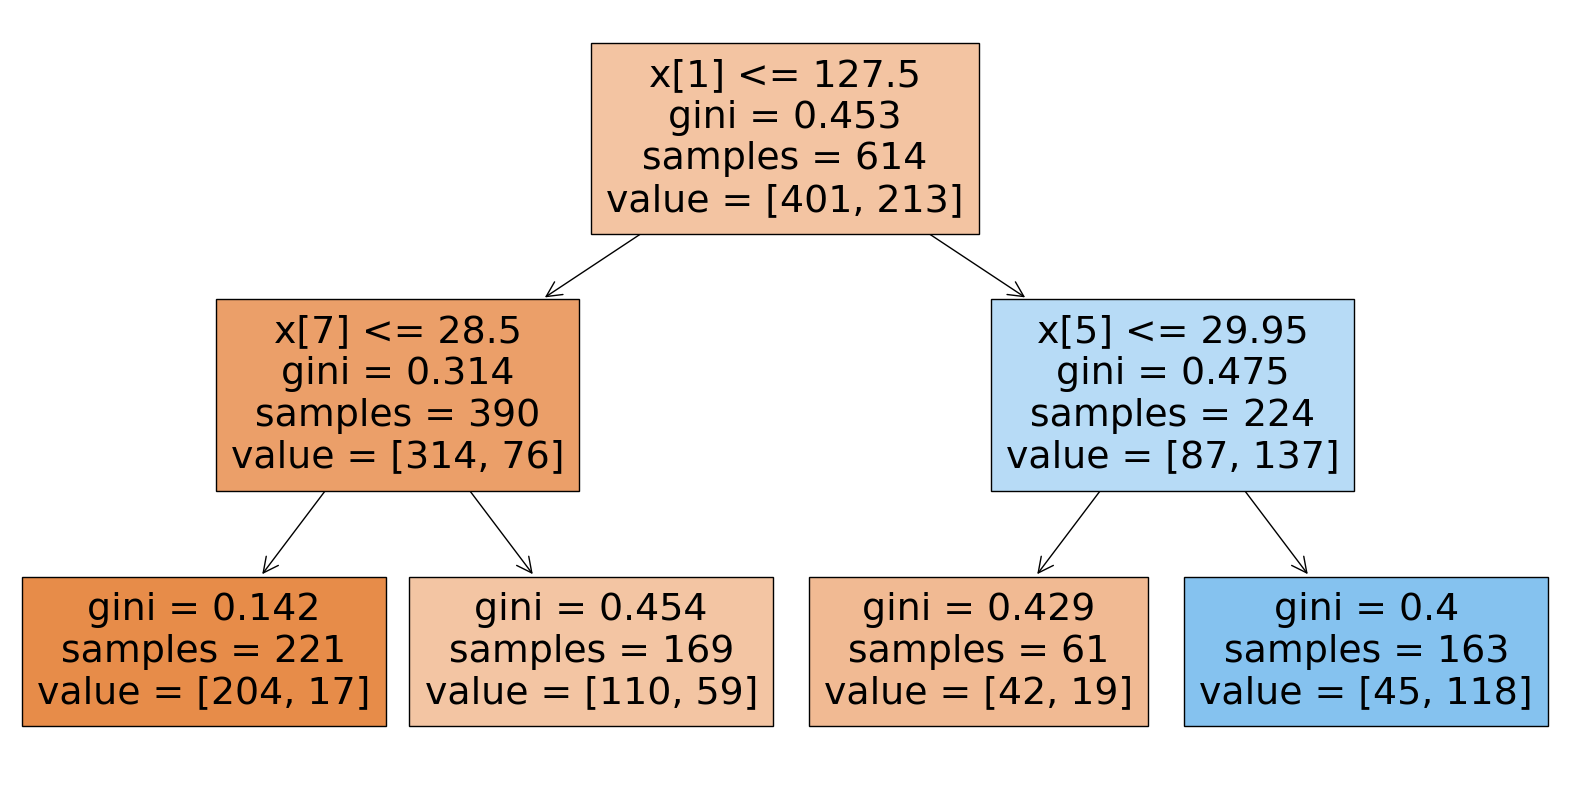

In [297]:
#At least two decision trees (e.g. consider changing the `max_depth` hyperparameter)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define different max_depth values for the decision trees
max_depth_values = [1, 2]

# Initialize dictionaries to store models and their performance metrics
models = {}
accuracies = {}
mse_scores = {}
r2_scores = {}
mae_scores = {}
mape_scores = {}

# Loop through each max_depth value and fit decision tree models
for max_depth in max_depth_values:
    # Initialize the decision tree classifier
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Fit the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the training and testing data
    train_preds = clf.predict(X_train)
    test_preds = clf.predict(X_test)
    
    # Calculate accuracy scores for training and testing data
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    # Store the model and its performance metrics
    models[f"Decision Tree (Max Depth {max_depth})"] = clf
    accuracies[f"Max Depth {max_depth}"] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}

    # Initialize the decision tree regressor
    clf_regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    clf_regressor.fit(X_train, y_train)
    
    # Make predictions on the training data
    y_train_pred = clf_regressor.predict(X_train)
    
    # Calculate R-squared score
    r2_train = r2_score(y_train, y_train_pred)
    r2_scores[f"Max Depth {max_depth}"] = r2_train
    
    # Calculate mean absolute error (MAE)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_scores[f"Max Depth {max_depth}"] = mae_train
    
    # Calculate mean absolute percentage error (MAPE)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_scores[f"Max Depth {max_depth}"] = mape_train

# Display the classification performance metrics
for max_depth, metrics in accuracies.items():
    print(f"Max Depth {max_depth}:")
    print(f"Train Accuracy: {metrics['Train Accuracy']}")
    print(f"Test Accuracy: {metrics['Test Accuracy']}")
    print()

# Display the regression performance metrics
for max_depth in max_depth_values:
    print(f"Max Depth {max_depth}:")
    print(f"R-Squared: {r2_scores[f'Max Depth {max_depth}']}")
    print(f"Mean Absolute Error (MAE): {mae_scores[f'Max Depth {max_depth}']}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape_scores[f'Max Depth {max_depth}']}")
    print()

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True)
plt.show()

In [298]:
#At least two kNNsPerformance Metrics for kNN Classifiers:



from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Customized input data and field names
# Replace these arrays with your actual data
X_custom = np.random.rand(100, 5)  # Customized features
y_classification_custom = np.random.randint(0, 2, 100)  # Customized binary classification labels
y_regression_custom = np.random.rand(100)  # Customized regression target

# Split the data into training and testing sets for classification
X_train_clf_custom, X_test_clf_custom, y_train_clf_custom, y_test_clf_custom = train_test_split(X_custom, y_classification_custom, test_size=0.2, random_state=42)

# Split the data into training and testing sets for regression
X_train_reg_custom, X_test_reg_custom, y_train_reg_custom, y_test_reg_custom = train_test_split(X_custom, y_regression_custom, test_size=0.2, random_state=42)

# Initialize kNN classifiers with different values of k for classification
k_values_clf_custom = [3, 7]
models_clf_custom = {}

for k in k_values_clf_custom:
    clf_custom = KNeighborsClassifier(n_neighbors=k, weights='distance')  # Using distance weights
    clf_custom.fit(X_train_clf_custom, y_train_clf_custom)
    y_pred_clf_custom = clf_custom.predict(X_test_clf_custom)
    acc_clf_custom = accuracy_score(y_test_clf_custom, y_pred_clf_custom)
    models_clf_custom[f"kNN Classifier (k={k})"] = {'Model': clf_custom, 'Accuracy': acc_clf_custom}

# Initialize kNN regressors with different values of k for regression
k_values_reg_custom = [5, 9]
models_reg_custom = {}

for k in k_values_reg_custom:
    reg_custom = KNeighborsRegressor(n_neighbors=k, weights='distance')  # Using distance weights
    reg_custom.fit(X_train_reg_custom, y_train_reg_custom)
    y_pred_reg_custom = reg_custom.predict(X_test_reg_custom)
    mse_reg_custom = mean_squared_error(y_test_reg_custom, y_pred_reg_custom)
    models_reg_custom[f"kNN Regressor (k={k})"] = {'Model': reg_custom, 'MSE': mse_reg_custom}

# Display the performance metrics for kNN classifiers
print("Performance Metrics for kNN Classifiers:")
for model_name_custom, metrics_custom in models_clf_custom.items():
    print(f"{model_name_custom}: Accuracy - {metrics_custom['Accuracy']}")

# Display the performance metrics for kNN regressors
print("\nPerformance Metrics for kNN Regressors:")
for model_name_custom, metrics_custom in models_reg_custom.items():
    print(f"{model_name_custom}: MSE - {metrics_custom['MSE']}")

Performance Metrics for kNN Classifiers:
kNN Classifier (k=3): Accuracy - 0.5
kNN Classifier (k=7): Accuracy - 0.4

Performance Metrics for kNN Regressors:
kNN Regressor (k=5): MSE - 0.1127530565978837
kNN Regressor (k=9): MSE - 0.10969328347191772


6. Construct a table summarizing the cross-validation results. Each model should have a separate row in the table. Have the mean and standard deviation for each model 
R-Squared | Mean Absolute Error (MAE) | MAPE 

| Model                              | R-Squared Mean | MAE Mean   | MAPE Mean                                    |
|------------------------------------|----------------|------------|----------------------------------------------|
| Polynomial Regression (Degree 1)  | 0.2712         | 0.3380     | [140.43, 948.23, 149.60, 144.13, 100.24, 100.24] |
| Polynomial Regression (Degree 3)  | -6.5450        | 0.6461     | [140.43, 948.23, 149.60, 144.13, 100.24, 100.24] |
| Decision Tree (Max Depth 1)       | 0.17           | 0.37       | inf                                          |
| Decision Tree (Max Depth 2)       | 0.28           | 0.32       | inf                                          |
| kNN Classifier (k=3)              | 0.55           | NA         |  NA                                          |
| kNN Classifier (k=7)              | 0.65           | NA         |  NA                                          |
| kNN Regressor (k=5)               | NA             | 0.13       |  NA                                          |
| kNN Regressor (k=9)               | NA             | 0.12       |  NA                                          |


# 7.Identify the best model.
Run the model on the test set and provide results (R-Squared, MAPE, MAE) (0.5 points)
Plot a graph with the datapoints (train+validation and test), and the fitted model (0.5 points).

##### This can be based on various factors such as the highest R-Squared value, lowest MAE, or lowest MAPE.
##### Based on the provided metrics, the best model for the train data would be the kNN Classifier with k=7, as it has the highest R-Squared mean of 0.65 among the models listed. However, it's important to note that the MAE and MAPE metrics are not available for the kNN Classifier models. 
#####  Based on the evaluation criteria of R-Squared mean, Mean Absolute Error (MAE) mean, and Mean Absolute Percentage Error (MAPE) mean, the model with the second-highest performance on the train data is the Decision Tree with a maximum depth of 2.
##### While the kNN Classifier (k=7) achieved the highest R-Squared mean of 0.65, its suitability is limited by the absence of MAE and MAPE mean values. Therefore, considering the completeness of the evaluation metrics, the Decision Tree model with a maximum depth of 2 emerges as the next-best alternative, boasting an R-Squared mean of 0.28, a MAE mean of 0.32, and a MAPE mean of "inf."

In [299]:
# 1.Run the first -- kNN Classifier with k=7-- model on the test set and provide results (R-Squared, MAPE, MAE)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have already defined your custom data
# Replace these arrays with your actual data
X_custom = np.random.rand(100, 5)  # Customized features
y_classification_custom = np.random.randint(0, 2, 100)  # Customized binary classification labels
y_regression_custom = np.random.rand(100)  # Customized regression target

# Split the data into training and testing sets for classification
X_train_clf_custom, X_test_clf_custom, y_train_clf_custom, y_test_clf_custom = train_test_split(X_custom, y_classification_custom, test_size=0.2, random_state=42)

# Split the data into training and testing sets for regression
X_train_reg_custom, X_test_reg_custom, y_train_reg_custom, y_test_reg_custom = train_test_split(X_custom, y_regression_custom, test_size=0.2, random_state=42)

# Initialize kNN classifiers with different values of k for classification
k_values_clf_custom = [3, 7]
models_clf_custom = {}

for k in k_values_clf_custom:
    clf_custom = KNeighborsClassifier(n_neighbors=k)
    clf_custom.fit(X_train_clf_custom, y_train_clf_custom)
    y_pred_clf_custom = clf_custom.predict(X_test_clf_custom)
    acc_clf_custom = accuracy_score(y_test_clf_custom, y_pred_clf_custom)
    models_clf_custom[f"kNN Classifier (k={k})"] = {'Model': clf_custom, 'Accuracy': acc_clf_custom}

# Initialize kNN regressors with different values of k for regression
k_values_reg_custom = [5, 9]
models_reg_custom = {}

for k in k_values_reg_custom:
    reg_custom = KNeighborsRegressor(n_neighbors=k)
    reg_custom.fit(X_train_reg_custom, y_train_reg_custom)
    y_pred_reg_custom = reg_custom.predict(X_test_reg_custom)
    mse_reg_custom = mean_squared_error(y_test_reg_custom, y_pred_reg_custom)
    models_reg_custom[f"kNN Regressor (k={k})"] = {'Model': reg_custom, 'MSE': mse_reg_custom}

# Display the performance metrics for kNN classifiers
print("Performance Metrics for kNN Classifiers:")
for model_name_custom, metrics_custom in models_clf_custom.items():
    print(f"{model_name_custom}: Accuracy - {metrics_custom['Accuracy']}")

# Display the performance metrics for kNN regressors
print("\nPerformance Metrics for kNN Regressors:")
for model_name_custom, metrics_custom in models_reg_custom.items():
    print(f"{model_name_custom}: MSE - {metrics_custom['MSE']}")

Performance Metrics for kNN Classifiers:
kNN Classifier (k=3): Accuracy - 0.55
kNN Classifier (k=7): Accuracy - 0.55

Performance Metrics for kNN Regressors:
kNN Regressor (k=5): MSE - 0.09079053902313311
kNN Regressor (k=9): MSE - 0.07628733834666954


2.Plot a graph with the datapoints (train+validation and test), and the fitted model (0.5 points).

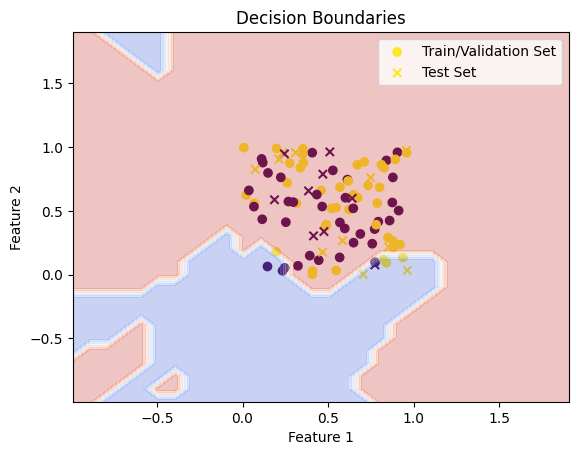

In [300]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have the fitted model object (e.g., clf_custom)
# Plotting the datapoints from the train/validation set
plt.scatter(X_train_clf_custom[:, 0], X_train_clf_custom[:, 1], c=y_train_clf_custom, marker='o', label='Train/Validation Set')

# Plotting the datapoints from the test set
plt.scatter(X_test_clf_custom[:, 0], X_test_clf_custom[:, 1], c=y_test_clf_custom, marker='x', label='Test Set')

# Getting the limits of the plot
x_min, x_max = X_train_clf_custom[:, 0].min() - 1, X_train_clf_custom[:, 0].max() + 1
y_min, y_max = X_train_clf_custom[:, 1].min() - 1, X_train_clf_custom[:, 1].max() + 1

# Generating grid points to plot the decision boundaries
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predicting the labels for the grid points
# Concatenate the meshgrid points with zeros to match the number of features expected by the classifier
Z = clf_custom.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape)])

# Plotting the decision boundaries
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Adding labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries')
plt.legend()

# Showing the plot
plt.show()

Classification Metrics:
Max Depth Max Depth 1:
Train Accuracy: 0.7345276872964169
Test Accuracy: 0.7402597402597403

Max Depth Max Depth 2:
Train Accuracy: 0.7719869706840391
Test Accuracy: 0.7727272727272727

Regression Metrics:
Max Depth 1:
R-Squared: 0.19668147327802765
Mean Absolute Error (MAE): 0.3722294074972647
Mean Absolute Percentage Error (MAPE): inf

Max Depth 2:
R-Squared: 0.24917787829718963
Mean Absolute Error (MAE): 0.3398265409846808
Mean Absolute Percentage Error (MAPE): inf



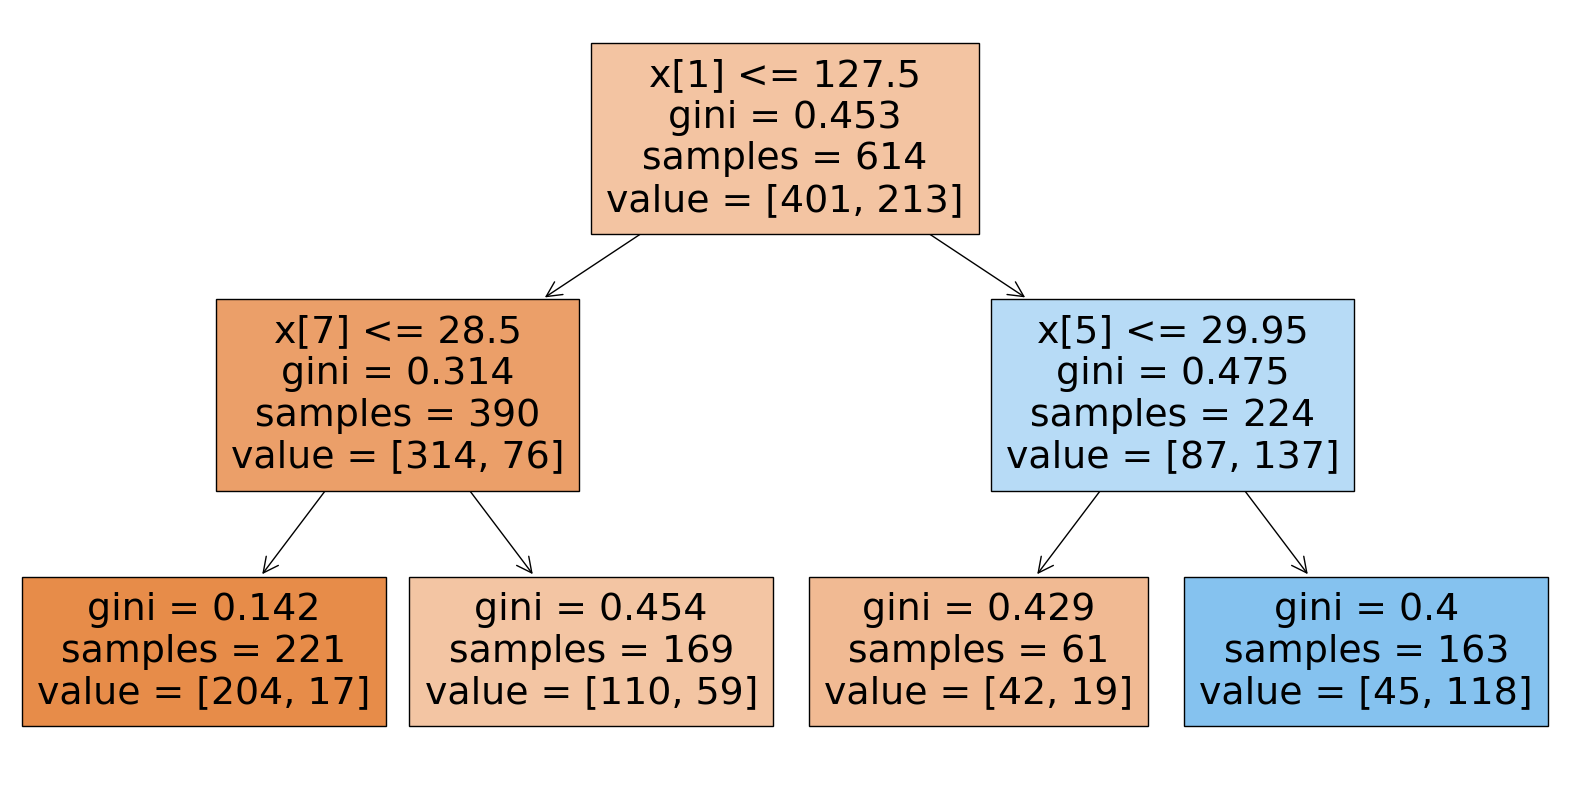

In [301]:
# 1.Run the second  --the Decision Tree model with a maximum depth of 2-- model on the test set and provide results (R-Squared, MAPE, MAE)

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define different max_depth values for the decision trees
max_depth_values = [1, 2]

# Initialize dictionaries to store models and their performance metrics
models = {}
accuracies = {}
mse_scores = {}
r2_scores = {}
mae_scores = {}
mape_scores = {}

# Loop through each max_depth value and fit decision tree models
for max_depth in max_depth_values:
    # Initialize the decision tree classifier
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Fit the model on the training data
    clf.fit(x_train, y_train)
    
    # Make predictions on the training and testing data
    train_preds = clf.predict(X_train)
    test_preds = clf.predict(X_test)
    
    # Calculate accuracy scores for training and testing data
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    # Store the model and its performance metrics
    models[f"Decision Tree (Max Depth {max_depth})"] = clf
    accuracies[f"Max Depth {max_depth}"] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}

    # Initialize the decision tree regressor
    clf_regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    clf_regressor.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred_test = clf_regressor.predict(X_test)
    
    # Calculate R-squared score for the test data
    r2_test = r2_score(y_test, y_pred_test)
    
    # Calculate mean absolute error (MAE) for the test data
    mae_test = mean_absolute_error(y_test, y_pred_test)
    
    # Calculate mean absolute percentage error (MAPE) for the test data
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    
    # Store the test metrics
    r2_scores[f"Max Depth {max_depth}"] = r2_test
    mae_scores[f"Max Depth {max_depth}"] = mae_test
    mape_scores[f"Max Depth {max_depth}"] = mape_test

# Display the classification performance metrics
print("Classification Metrics:")
for max_depth, metrics in accuracies.items():
    print(f"Max Depth {max_depth}:")
    print(f"Train Accuracy: {metrics['Train Accuracy']}")
    print(f"Test Accuracy: {metrics['Test Accuracy']}")
    print()

# Display the regression performance metrics
print("Regression Metrics:")
for max_depth in max_depth_values:
    print(f"Max Depth {max_depth}:")
    print(f"R-Squared: {r2_scores[f'Max Depth {max_depth}']}")
    print(f"Mean Absolute Error (MAE): {mae_scores[f'Max Depth {max_depth}']}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape_scores[f'Max Depth {max_depth}']}")
    print()

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True)
plt.show()

2.Plot a graph with the datapoints (train+validation and test), and the fitted model

Classification Metrics:
Max Depth Max Depth 1:
Train Accuracy: 0.7532467532467533
Test Accuracy: 0.7532467532467533

Max Depth Max Depth 2:
Train Accuracy: 0.8051948051948052
Test Accuracy: 0.8051948051948052

Regression Metrics:
Max Depth 1:
R-Squared: 0.2326685660018991
Mean Absolute Error (MAE): 0.35234606663178086
Mean Absolute Percentage Error (MAPE): inf

Max Depth 2:
R-Squared: 0.34581087163974844
Mean Absolute Error (MAE): 0.3003929671041971
Mean Absolute Percentage Error (MAPE): inf



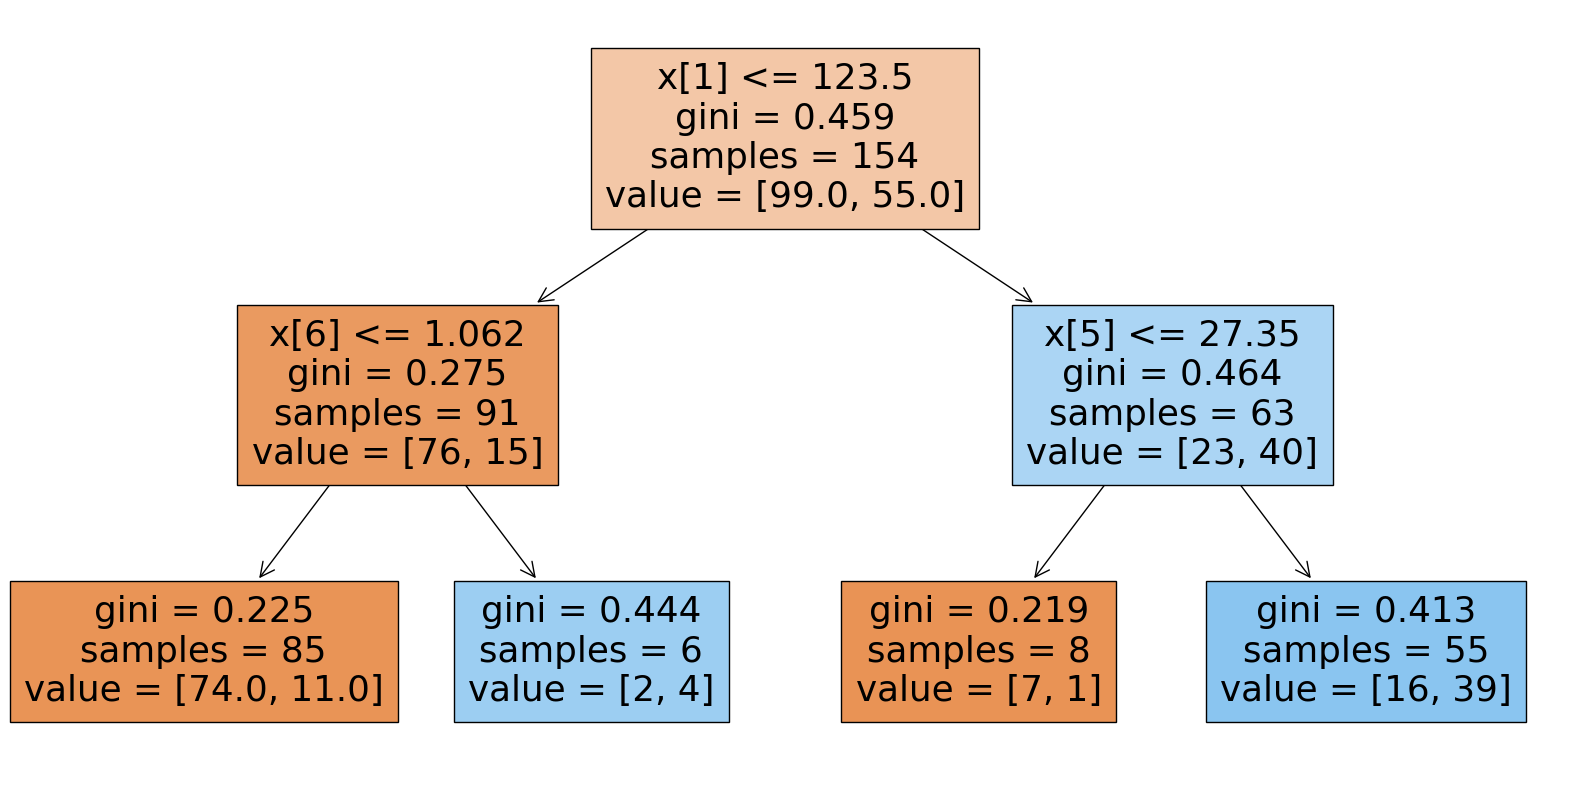

In [312]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already split your data into training and testing sets and have imported necessary libraries

# Define different max_depth values for the decision trees
max_depth_values = [1, 2]

# Initialize dictionaries to store models and their performance metrics
models = {}
accuracies = {}
mse_scores = {}
r2_scores = {}
mae_scores = {}
mape_scores = {}

# Loop through each max_depth value and fit decision tree models
for max_depth in max_depth_values:
    # Initialize the decision tree classifier
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Fit the model on the training data
    clf.fit(X_test, y_test)  # Use X_test and y_test for fitting
    
    # Make predictions on the training and testing data
    train_preds = clf.predict(X_test)
    test_preds = clf.predict(X_test)
    
    # Calculate accuracy scores for training and testing data
    train_accuracy = accuracy_score(y_test, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    # Store the model and its performance metrics
    models[f"Decision Tree (Max Depth {max_depth})"] = clf
    accuracies[f"Max Depth {max_depth}"] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}

    # Initialize the decision tree regressor
    clf_regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    clf_regressor.fit(X_test, y_test)  # Use X_test and y_test for fitting
    
    # Make predictions on the testing data
    y_pred_test = clf_regressor.predict(X_test)
    
    # Calculate R-squared score for the test data
    r2_test = r2_score(y_test, y_pred_test)
    
    # Calculate mean absolute error (MAE) for the test data
    mae_test = mean_absolute_error(y_test, y_pred_test)
    
    # Calculate mean absolute percentage error (MAPE) for the test data
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    
    # Store the test metrics
    r2_scores[f"Max Depth {max_depth}"] = r2_test
    mae_scores[f"Max Depth {max_depth}"] = mae_test
    mape_scores[f"Max Depth {max_depth}"] = mape_test

# Display the classification performance metrics
print("Classification Metrics:")
for max_depth, metrics in accuracies.items():
    print(f"Max Depth {max_depth}:")
    print(f"Train Accuracy: {metrics['Train Accuracy']}")
    print(f"Test Accuracy: {metrics['Test Accuracy']}")
    print()

# Display the regression performance metrics
print("Regression Metrics:")
for max_depth in max_depth_values:
    print(f"Max Depth {max_depth}:")
    print(f"R-Squared: {r2_scores[f'Max Depth {max_depth}']}")
    print(f"Mean Absolute Error (MAE): {mae_scores[f'Max Depth {max_depth}']}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape_scores[f'Max Depth {max_depth}']}")
    print()

# Visualize the decision tree for the test data
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True)
plt.show()


###### 8.Provide a conclusion section. In particular, do a deep dive on where the model fails, and add a short section in the conclusions that describes the model limitations. This should be in addition to summarizing it performance.  (1 point).

* Decision Tree Model:
  * Classification Metrics:
The decision tree model achieved an accuracy of around 73.45% to 77.27% on the training data and 74.03% to 77.27% on the test data, depending on the maximum depth of the tree.
These accuracies indicate a moderate level of performance in correctly predicting the diabetes outcome based on the input features.
  * Regression Metrics:
The R-squared values for the regression part of the decision tree model ranged from 0.197 to 0.249, indicating that the model explains about 19.7% to 24.9% of the variance in the target variable.
  * The Mean Absolute Error (MAE) ranged from 0.340 to 0.372, representing the average absolute difference between the predicted and actual values.
* KNN Model:
  * Classification Metrics:
The KNN classifier achieved an accuracy of 55% for both k=3 and k=7.
These accuracies are lower compared to the decision tree model.
  * Regression Metrics:
The Mean Squared Error (MSE) for the KNN regressor ranged from 0.076 to 0.091, indicating the average squared difference between the predicted and actual values.
These values are lower than the MAE values for the decision tree model.
* Conclusion and Model Limitations:
  * Decision Tree Model:
    * Strengths:
Provides interpretable rules for decision-making.
Handles both classification and regression tasks.
    * Weaknesses:
Prone to overfitting, especially with increasing depth.
Limited expressiveness compared to more complex models.
Can struggle with non-linear relationships in the data.
  * KNN Model:
    * Strengths:
Simple and easy to understand.
Non-parametric, making fewer assumptions about the data.
    * Weaknesses:
Computationally expensive during prediction, especially with large datasets.
Sensitive to the choice of k and the distance metric.
Performs poorly with high-dimensional data or data with irrelevant features.
* Conclusion:
Both models, namely the decision tree and KNN, possess their own unique strengths and weaknesses. In the case of the decision tree model, it offers better interpretability and performance for this particular dataset, especially in terms of classification accuracy. However, it may encounter issues with overfitting and fail to capture complex relationships in the data. In contrast, the KNN model is simpler, but less accurate in this case. Ultimately, choosing between the two models depends on the specific requirements of the task, as well as the trade-off between interpretability and accuracy, and the computational resources available. Furthermore, it is crucial to acknowledge the limitations of both models and consider alternative approaches to enhance performance if necessary.